# Epsilon=f(d) (i.e. privacy=f(perf))

Algo inf_bound (Aurélien bound vs Balle bound)

delta, tau, Plie et n fixes

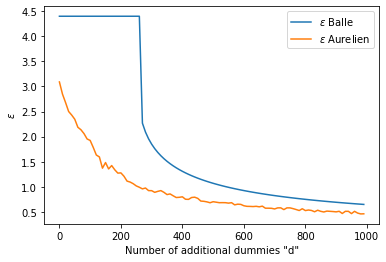

In [1]:
##################################################
# epsilon=f(d) algo inf-bound
%load_ext autoreload
%autoreload 2

from Ploting import *
from Theorical_functions import *
from Serialization import *


erase=False
delta=1e-4
tau=20
n=100
Plie=0.2  
dmax=1000
nb_runs=1000

x_coordinates = []
eps_balle=[]
eps_aurelien=[]


name='epsilon_f(d)-inf-bound,tau_{},n_{},delta_{},Plie_{},dmax_{},nb_runs_{}'.format(tau,n,delta,Plie,dmax,nb_runs)


if do_storage_exists(name+"2") and erase==False:
    eps_balle=restore(name+"1")
    eps_aurelien=restore(name+"2")
    for d in range(0,dmax,10):
        print("d=",d,end="\r",flush=True)
        x_coordinates.append(d)

else:
    for d in range(0,dmax,10):
        print("d=",d,end="\r",flush=True)
        x_coordinates.append(d)
        eps_balle.append(eps_algo(tau,n,d, Plie,delta))
        eps_aurelien.append(get_epsilon_Semi_TH_optimized(tau,Plie,n,d,delta,nb_runs))

    store(name+"1",eps_balle)
    store(name+"2",eps_aurelien)


           

plt.plot(x_coordinates, eps_balle, label="$\\varepsilon$ Balle")
plt.plot(x_coordinates, eps_aurelien, label="$\\varepsilon$ Aurelien")

plt.legend()


plt.xlabel('Number of additional dummies "d"')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ en fonction du nombre de dummies "d" Balle vs Aurelien')


saveFig(name)
##################################################













    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


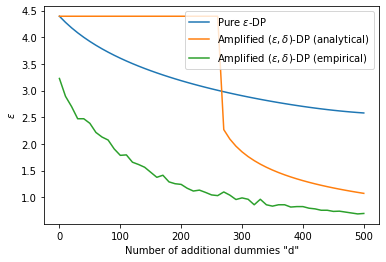

In [11]:
##################################################
# epsilon=f(d) algo inf-bound
%load_ext autoreload
%autoreload 2

from Ploting import *
from Theorical_functions_IC import *
from Serialization_IC import *


erase=False
delta=1e-4
tau=20
n=100
Plie=0.2  
dmax=501
nb_runs=1000

x_coordinates = []
eps_balle=[]
eps_aurelien=[]
eps_aurelien_min=[]
eps_aurelien_max=[]
eps_exact=[]
name='epsilon_f(d)-inf-bound,tau_{},n_{},delta_{},Plie_{},dmax_{},nb_runs_{}'.format(tau,n,delta,Plie,dmax,nb_runs)


if do_storage_exists(name+"2") and erase==False:
    eps_balle=restore(name+"1")
    eps_aurelien=restore(name+"2")
    eps_aurelien_min=restore(name+"3")
    eps_aurelien_max=restore(name+"4")
    for d in range(0,dmax,10):
        print("d=",d,end="\r",flush=True)
        x_coordinates.append(d)
        eps_exact.append(eps_algo_exact_formula(tau,dmax,d, Plie))

else:
    for d in range(0,dmax,10):
        print("d=",d,end="\r",flush=True)
        x_coordinates.append(d)
        eps_balle.append(eps_algo(tau,n,d, Plie,delta))
        eps,eps_min,eps_max=get_epsilon_Semi_TH_optimized(tau,Plie,n,d,delta,nb_runs)
        eps_aurelien.append(eps)
        eps_aurelien_min.append(eps_min)
        eps_aurelien_max.append(eps_max)
        eps_exact.append(eps_algo_exact_formula(tau,n,d, Plie))

    store(name+"1",eps_balle)
    store(name+"2",eps_aurelien)
    store(name+"3",eps_aurelien_min)
    store(name+"4",eps_aurelien_max)
           
           

plt.plot(x_coordinates, eps_exact, label="Pure $\epsilon$-DP")
plt.plot(x_coordinates, eps_balle, label="Amplified $(\epsilon,\delta)$-DP (analytical)")
plt.plot(x_coordinates, eps_aurelien, label="Amplified $(\epsilon,\delta)$-DP (empirical)")

plt.legend()


plt.xlabel('Number of additional dummies "d"')
plt.ylabel('$\\varepsilon$')
#plt.title('$\\varepsilon$ en fonction du nombre de dummies "d" Balle vs Aurelien')
#plt.fill_between(x_coordinates, (eps_aurelien_min), (eps_aurelien_max), color='orange', alpha=.2)


saveFig(name)
##################################################













    